### Why?

Перед тем как делать выбор в пользу новых/сложных моделей, сначала нужно проверить как работают baseline подходы. Потому что сложные модели трудно поддерживать, и если они не дают существенного прироста по качеству, то и смысла в них немного.

Для задачи классификации таковыми являются, например, логистическая регрессия и метод опорных векторов.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("./data/valve1/0.csv", sep=";", parse_dates=True, index_col="datetime")

anomaly = df.anomaly
df.drop(["anomaly", "changepoint"], axis=1, inplace=True)
df.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2020-03-09 10:14:33,0.026588,0.040111,1.33020,0.054711,79.3366,26.0199,233.062,32.0
2020-03-09 10:14:34,0.026170,0.040453,1.35399,0.382638,79.5158,26.0258,236.040,32.0
2020-03-09 10:14:35,0.026199,0.039419,1.54006,0.710565,79.3756,26.0265,251.380,32.0
2020-03-09 10:14:36,0.026027,0.039641,1.33458,0.382638,79.6097,26.0393,234.392,32.0
2020-03-09 10:14:37,0.026290,0.040273,1.07851,-0.273216,79.6109,26.0420,225.342,32.0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [28]:
clf = LogisticRegression()

ss = StandardScaler()
X = ss.fit_transform(df)

In [13]:
cv = ShuffleSplit(n_splits=30, train_size=0.8, random_state=42)
scores = cross_val_score(clf, X, anomaly, cv=cv, scoring='f1')

### Logistic regression F1 scores with cross validation and shuffle

In [14]:
pd.Series(scores).describe()

count    30.000000
mean      0.748648
std       0.039648
min       0.658065
25%       0.720645
50%       0.757616
75%       0.775271
max       0.815217
dtype: float64

### Predict & vizualization for one split

In [15]:
from sklearn.model_selection import train_test_split
from utils.metrics import f1_score, far, mar

X_train, X_test, y_train, y_test = train_test_split(X, anomaly, train_size=0.8, random_state=42)

In [30]:
clf.fit(X_train, y_train)
y_pred = pd.Series(clf.predict(X_test))

print(f"F1 = {f1_score(y_pred, y_test)}\n", 
      f"FAR = {far(y_pred, y_test)}\n", 
      f"MAR = {mar(y_pred, y_test)}", sep="")

F1 = 0.7928994082840237
FAR = 0.09219858156028368
MAR = 0.24719101123595505


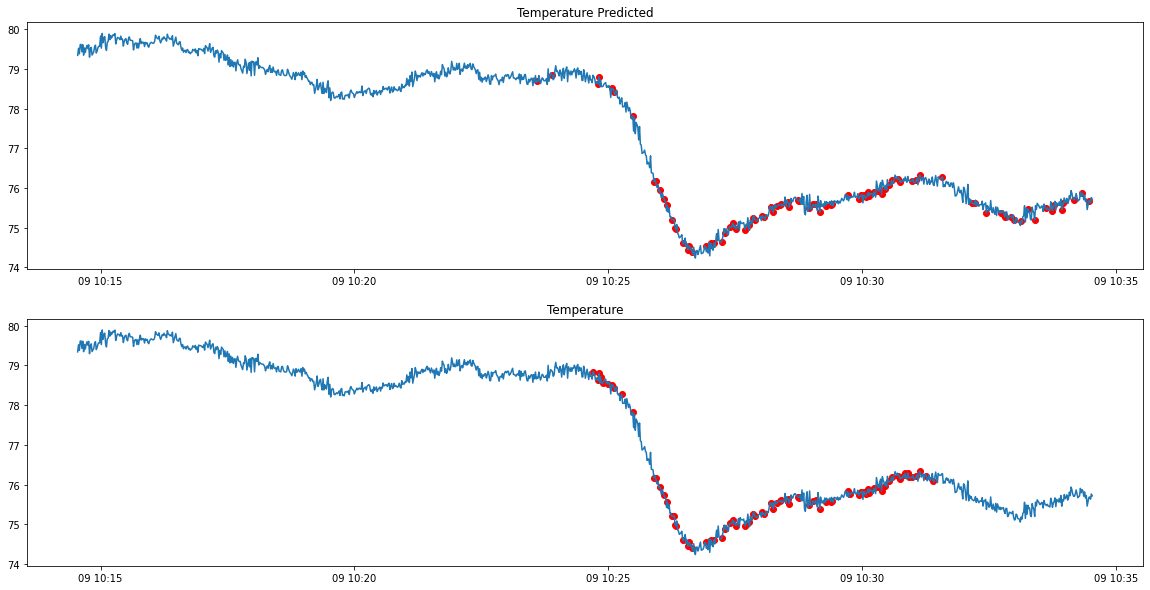

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(20,10))
temperatures = df.Temperature
axs[0].plot(temperatures)
axs[1].plot(temperatures)

anomalies_indecies = y_test.index[y_pred == 1]
axs[0].scatter(df.loc[anomalies_indecies].index, temperatures[anomalies_indecies], color='r')
axs[0].set_title("Temperature Predicted")

anomalies_indecies = y_test.index[y_test == 1]
axs[1].scatter(df.loc[anomalies_indecies].index, temperatures[anomalies_indecies], color='r')
axs[1].set_title("Temperature")

plt.show()

### Applying the method for all datasets

In [69]:
from utils.pipeline import Pipeline, Predictor


class LogisticRegression_Predictor(Predictor):
    def make_prediction(self, df):
        anomaly = df.anomaly
        df = df.drop(['anomaly','changepoint'], axis=1)
        ss = StandardScaler()
        
        X = ss.fit_transform(df)
        X_train, X_test, y_train, y_test = train_test_split(
            X, anomaly, train_size=0.8, random_state=42)
        
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        return pd.Series(model.predict(X), df.index)

Anomaly: valve1


IntProgress(value=0, description='Computing', max=16, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.8730198225097454

FAR = 0.040924816471183866

MAR = 0.16579489618006024

Anomaly: valve2


IntProgress(value=0, description='Computing', max=4, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.8531420765027322

FAR = 0.057960644007155636

MAR = 0.17666446934739619

Anomaly: other0


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9608938547486033

FAR = 0.018944519621109608

MAR = 0.04656319290465632

Anomaly: other1


/home/dabdya/Documents/anomaly_detection/utils/pipeline.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,3))


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9770408163265306

FAR = 0.0

MAR = 0.04488778054862843

Anomaly: other2


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9987819732034104

FAR = 0.0013422818791946308

MAR = 0.0

Anomaly: other3


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.8448598130841122

FAR = 0.0

MAR = 0.2686084142394822

Anomaly: other4


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.7485822306238186

FAR = 0.10030395136778116

MAR = 0.2528301886792453

Anomaly: other5


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.954954954954955

FAR = 0.010825439783491205

MAR = 0.0678391959798995

Anomaly: other6


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9633507853403142

FAR = 0.017953321364452424

MAR = 0.02127659574468085

Anomaly: other7


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9927431059506531

FAR = 0.0

MAR = 0.01440922190201729

Anomaly: other8


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.8809946714031972

FAR = 0.059379217273954114

MAR = 0.15358361774744028

Anomaly: other9


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9215686274509803

FAR = 0.04643449419568822

MAR = 0.06622516556291391

Anomaly: other10


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9487179487179487

FAR = 0.018844221105527637

MAR = 0.06329113924050633

Anomaly: other11


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.9770992366412213

FAR = 0.0

MAR = 0.04477611940298507

Anomaly: other12


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.8326639892904953

FAR = 0.04435483870967742

MAR = 0.228287841191067

Anomaly: other13


IntProgress(value=0, description='Computing', max=1, style=ProgressStyle(bar_color='#61dc8a'))

F1 = 0.927536231884058

FAR = 0.05808080808080808

MAR = 0.08333333333333333

CPU times: user 4.75 s, sys: 890 ms, total: 5.64 s
Wall time: 4.13 s


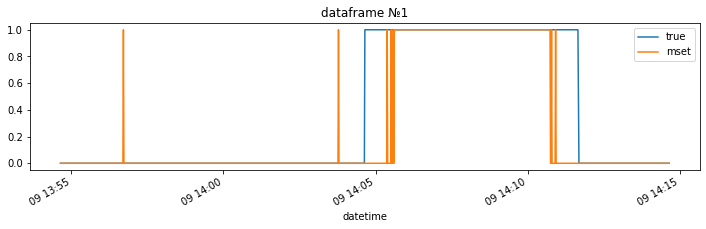

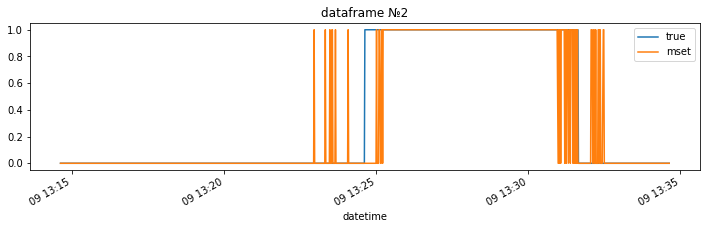

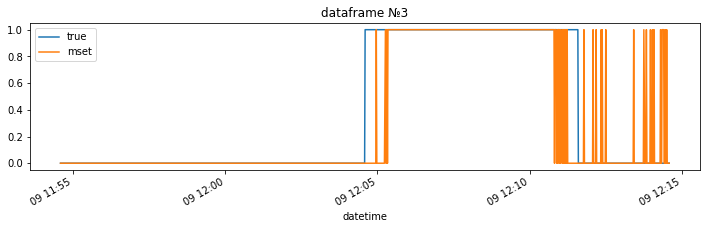

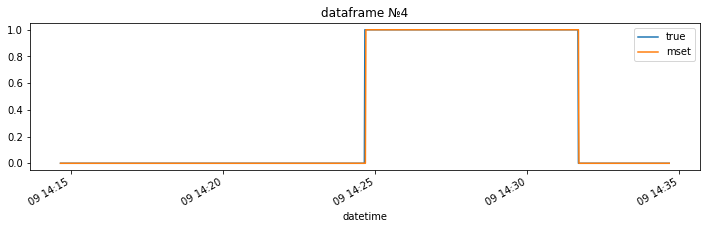

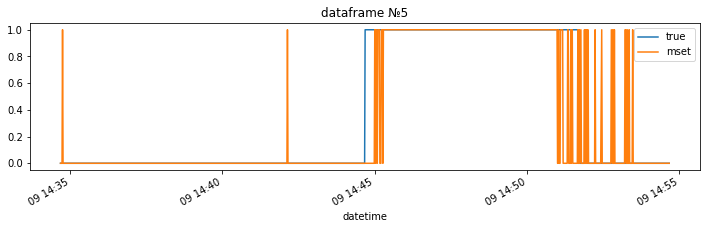

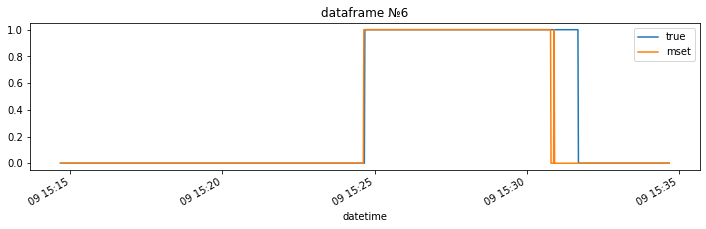

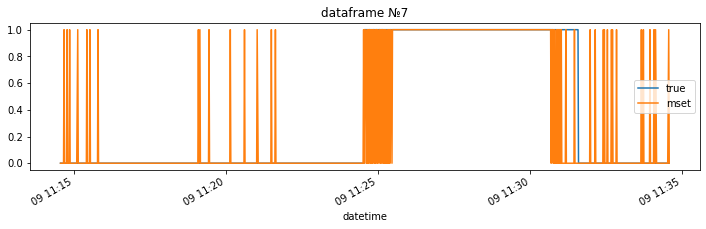

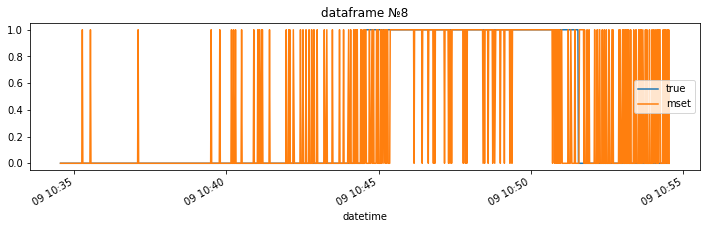

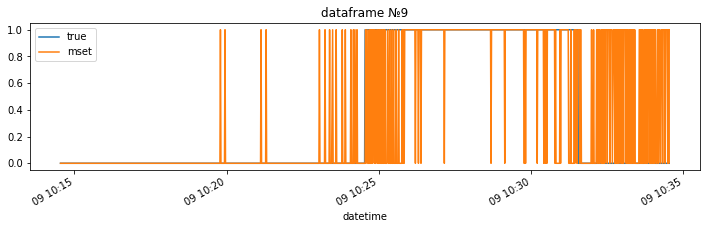

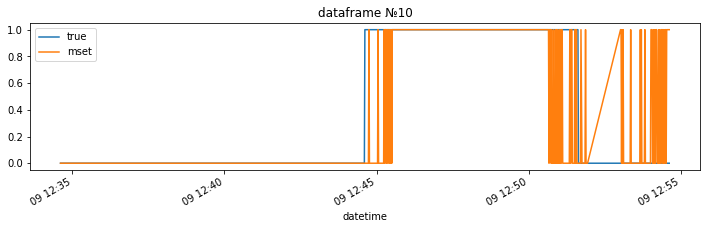

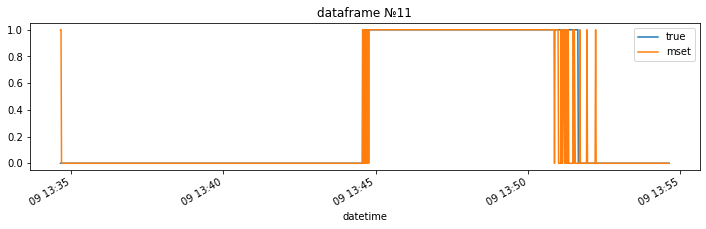

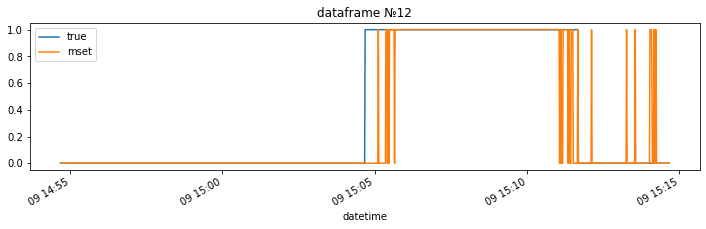

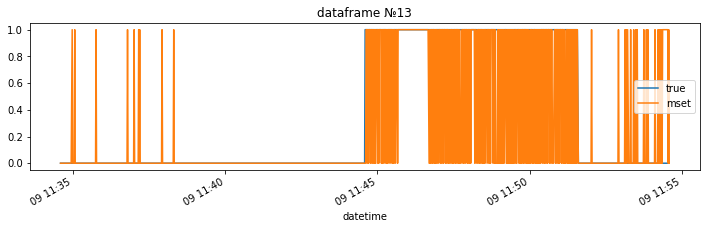

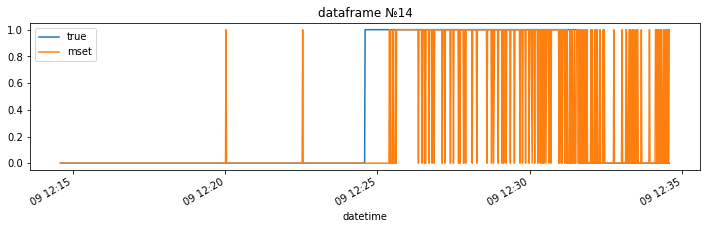

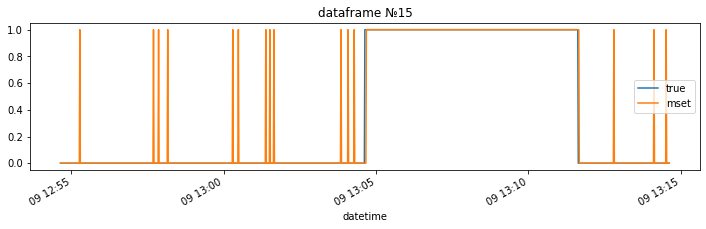

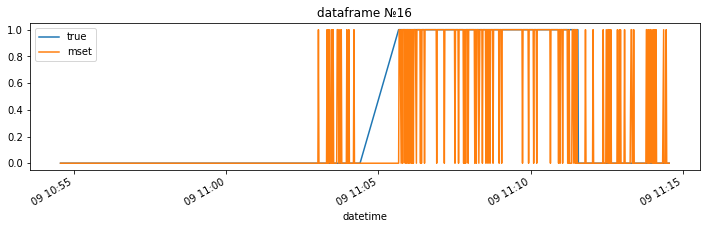

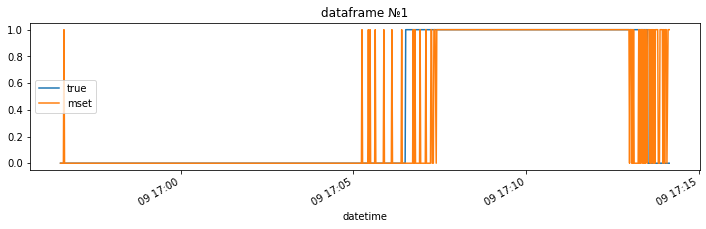

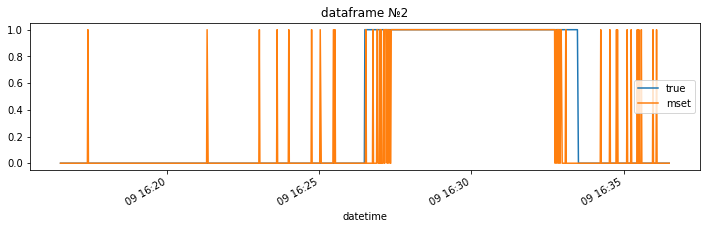

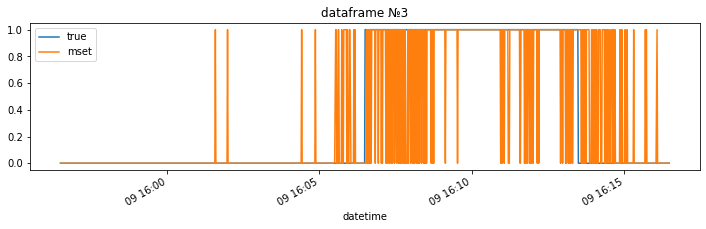

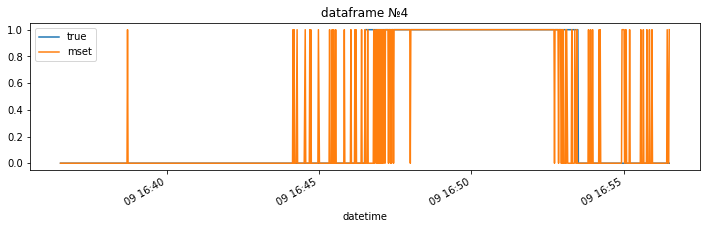

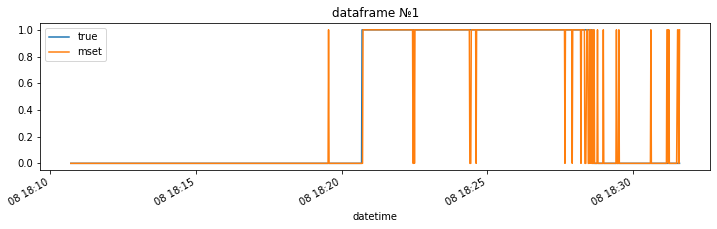

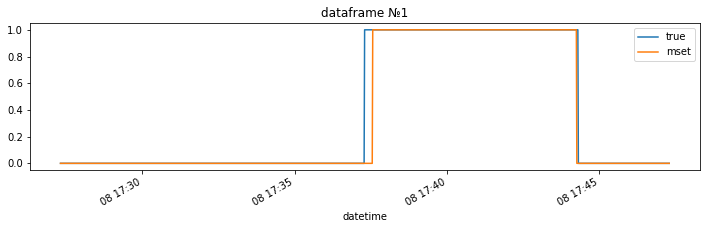

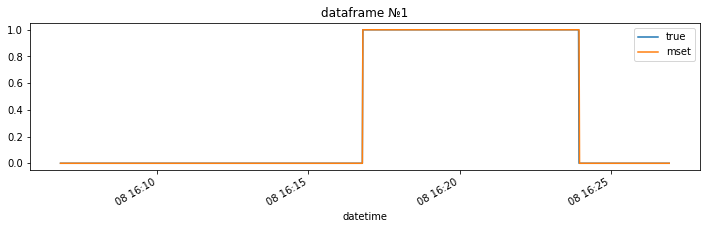

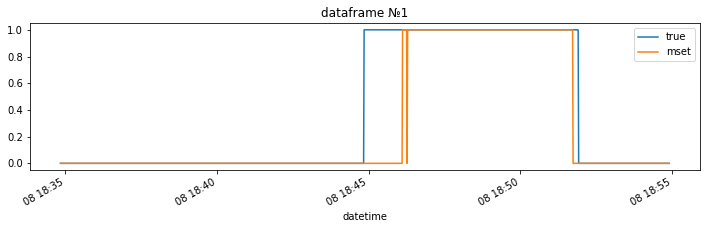

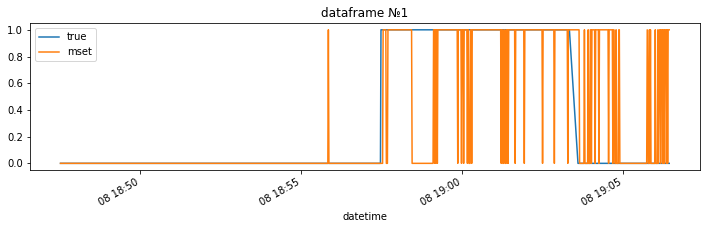

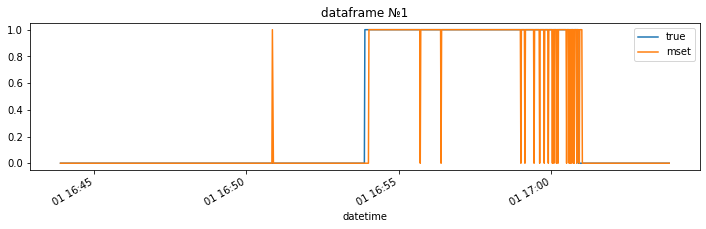

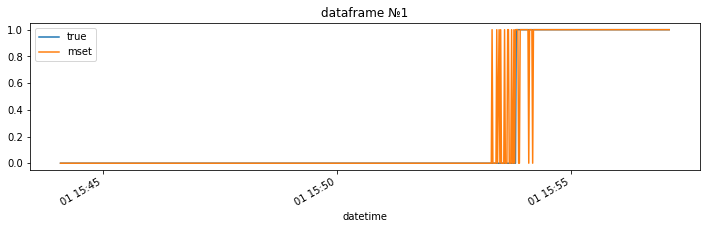

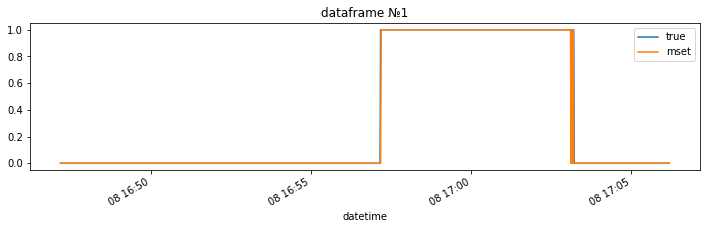

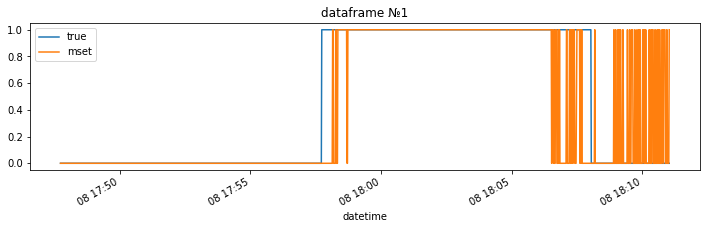

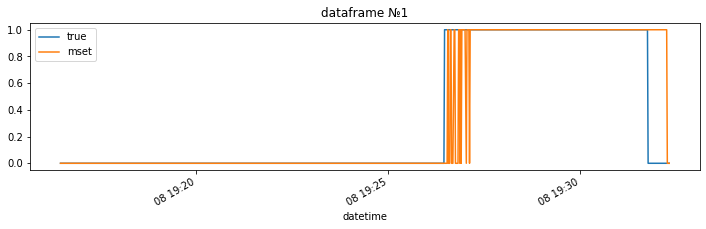

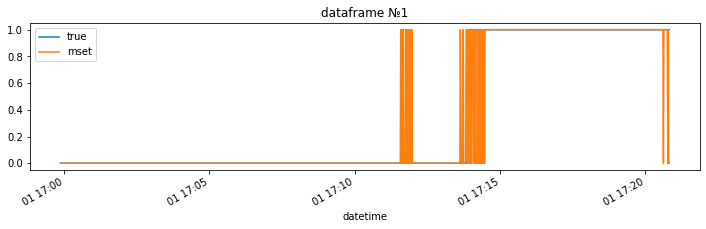

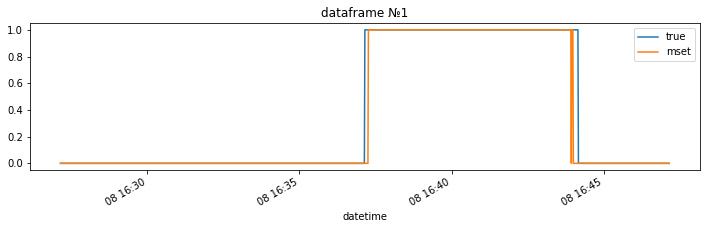

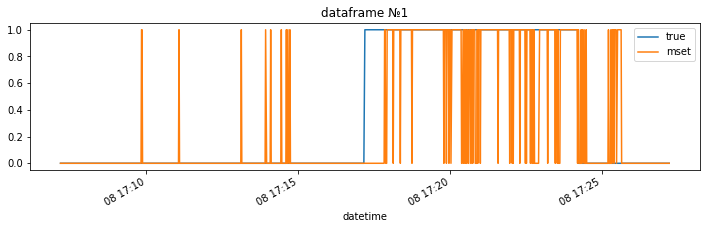

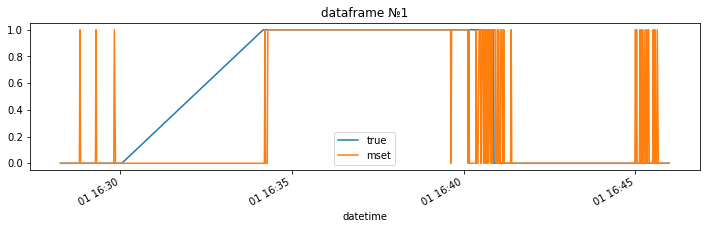

In [70]:
%%time
from utils.data import load_df

anomaly_types = ("valve1", "valve2", "other", )
anomaly_groups = dict()

for anomaly_type in anomaly_types:
    list_of_df, _ = load_df("./data/", anomaly_type)
    if anomaly_type == "other":
        for i, df in enumerate(list_of_df):
            anomaly_groups[f"{anomaly_type}{i}"] = [df, ]
    else:
        anomaly_groups[f"{anomaly_type}"] = list_of_df

predictor = LogisticRegression_Predictor()
p = Pipeline()

metrics = dict()

for anomaly_type, list_of_df in anomaly_groups.items():
    metric = p.run(list_of_df, predictor, anomaly_description=anomaly_type)
    metrics[anomaly_type] = metric

In [71]:
from utils.metrics import f1_score, far, mar

pred_outlier = pd.concat([pd.concat(p.all_predictions[i]) 
                          for i in range(len(p.all_predictions))])

list_of_all_df = []
for anomaly_type in anomaly_types:
    list_of_df, _ = load_df("./data/", anomaly_type)
    if anomaly_type == "other":
        for i, df in enumerate(list_of_df):
            list_of_all_df.append(pd.concat([df.anomaly for df in [df, ]]))
    else:
        list_of_all_df.append(pd.concat([df.anomaly for df in list_of_df]))

true_outlier = pd.concat(list_of_all_df)

f1 = f1_score(true_outlier, pred_outlier)
far_score = far(true_outlier, pred_outlier)
mar_score = mar(true_outlier, pred_outlier)

metrics["all"] = (f1, far_score, mar_score)

In [72]:
from utils.data import show_score_table

show_score_table(metrics)

metric | valve1 | valve2 | other0 | other1 | other2 | other3 | other4 | other5 | other6 | other7 | other8 | other9 | other10 | other11 | other12 | other13 | all
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
F1 |0.87 | 0.85 | 0.96 | 0.98 | 1.0 | 0.84 | 0.75 | 0.95 | 0.96 | 0.99 | 0.88 | 0.92 | 0.95 | 0.98 | 0.83 | 0.93 | 0.89
FAR |0.04 | 0.06 | 0.02 | 0.0 | 0.0 | 0.0 | 0.1 | 0.01 | 0.02 | 0.0 | 0.06 | 0.05 | 0.02 | 0.0 | 0.04 | 0.06 | 0.04
MAR |0.17 | 0.18 | 0.05 | 0.04 | 0.0 | 0.27 | 0.25 | 0.07 | 0.02 | 0.01 | 0.15 | 0.07 | 0.06 | 0.04 | 0.23 | 0.08 | 0.14